# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


## Pengenalan Dataset

Dataset House Price Prediction digunakan untuk memprediksi harga rumah berdasarkan
berbagai fitur seperti luas bangunan, jumlah kamar, tahun pembangunan, dan lokasi.

Sumber dataset: Kaggle – House Prices Advanced Regression Techniques  
Jumlah data: 1460 baris  
Jumlah fitur: 81 kolom  
Target variabel: SalePrice (harga rumah)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import mlflow
import mlflow.sklearn


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv("../namadataset_raw/train.csv")

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

In [7]:
df_numeric = df.select_dtypes(include=['number'])


In [8]:
corr = df_numeric.corr()



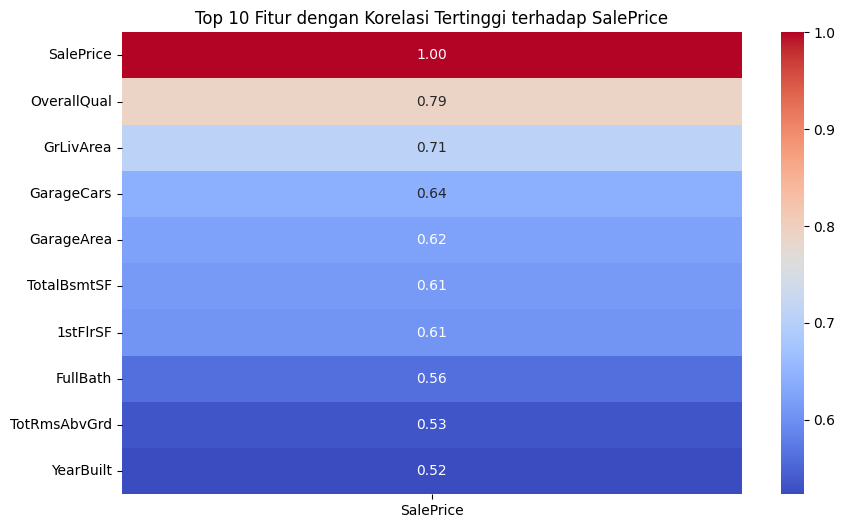

In [9]:
plt.figure(figsize=(10,6))

top_corr = corr[['SalePrice']] \
    .sort_values(by='SalePrice', ascending=False) \
    .head(10)

sns.heatmap(
    top_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Top 10 Fitur dengan Korelasi Tertinggi terhadap SalePrice")
plt.show()


### Insight Korelasi

Berdasarkan heatmap korelasi, fitur OverallQual dan GrLivArea memiliki
hubungan paling kuat terhadap harga rumah (SalePrice). Hal ini menunjukkan
bahwa kualitas bangunan dan luas area tinggal merupakan faktor utama
dalam menentukan harga rumah.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
df_numeric = df.select_dtypes(include=['number'])


In [11]:
df_numeric.isnull().sum().sort_values(ascending=False).head()


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
LotArea          0
MSSubClass       0
dtype: int64

In [12]:
df_numeric.fillna(df_numeric.median(), inplace=True)


In [13]:
X = df_numeric.drop("SalePrice", axis=1)
y = df_numeric["SalePrice"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression RMSE: 36879.819321927025
Linear Regression R2: 0.8226775450640491


Model Linear Regression dievaluasi menggunakan RMSE dan R².
RMSE digunakan untuk mengukur rata-rata kesalahan prediksi,
sementara R² menunjukkan seberapa baik model menjelaskan variansi data.


In [17]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest RMSE: 29159.325958926194
Random Forest R2: 0.8891486140990713


### Perbandingan Model

| Model | RMSE | R² |
|------|------|----|
| Linear Regression | 36879 | 0.82 |
| Random Forest | 29159 | 0.88 |

Berdasarkan evaluasi, Random Forest menghasilkan performa yang lebih baik
dibandingkan Linear Regression sehingga dipilih sebagai model terbaik.


In [18]:
mlflow.set_experiment("House Price Prediction")

2025/12/20 07:46:14 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/20 07:46:14 INFO mlflow.store.db.utils: Updating database tables
2025/12/20 07:46:14 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/20 07:46:14 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/20 07:46:14 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2025/12/20 07:46:14 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025/12/20 07:46:14 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025/12/20 07:46:14 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025/12/20 07:46:14 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025/12/20 07:46:14 INFO alembic.runtime.migration: Running 

<Experiment: artifact_location='file:///d:/ASAHDICODING/LASTSUBMISSION/Eksperiment_SML_AchmadHaikalMaali/preprocessing/mlruns/1', creation_time=1766191575268, experiment_id='1', last_update_time=1766191575268, lifecycle_stage='active', name='House Price Prediction', tags={}>

In [19]:
with mlflow.start_run(run_name="RandomForest"):
    mlflow.log_metric("rmse", rmse_rf)
    mlflow.log_metric("r2", r2_rf)
    mlflow.sklearn.log_model(rf, "model")


2025/12/20 07:46:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [20]:
import joblib, os

os.makedirs("../models", exist_ok=True)

joblib.dump(rf, "../models/house_price_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']

In [21]:
os.makedirs("../namadataset_preprocessing", exist_ok=True)

df.to_csv(
    "../namadataset_preprocessing/train_preprocessed.csv",
    index=False
)

print("Preprocessed dataset saved")

Preprocessed dataset saved
